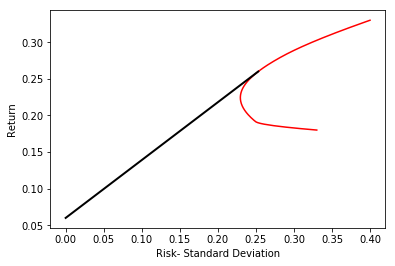

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import gurobipy 
N =100
#***************INPUTS**********************************************************************************
# enter the cov matrix as a 2-D array
cov = np.array([[0.0784,0.03413256,0.0172368],[0.03413256,0.1089,0.0283536],[0.0172368,0.0283536,0.16]])
# enter return matrix as a 1D array
ret = np.array([0.2,0.18,.33])
Rf = 0.06 # Risk free rate
#########################################################################################################
minel= np.amin(ret)
maxel = np.amax(ret)
length = int(len(ret))
ret=np.reshape(ret,(length,1))
mup= minel
G = -np.eye(length)
h = np.zeros((length))
A =np.array( np.concatenate((np.ones((1,length)),ret.T), axis=0))
Return =[]
Risk = []
b =[]
b.append(1)
Allocation = np.empty((len(np.linspace(minel,maxel, 151)), length))
for x,mup in enumerate(np.linspace(minel,maxel, 151)):
    b.append(mup)
    w = cp.Variable(length)
    prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(w, 2*cov) ),[G@w <= h,A@w == b])
    prob.solve(solver =cp.GUROBI)
    Return.append(mup)
    Risk.append(np.sqrt(prob.value))
    for i in range(length):
        Allocation[x][i]= w.value[i]
    del b[-1]
    

#getting allocations in excel
import xlsxwriter
Return = np.array(Return)
Risk = np.array(Risk)
Allocation = np.array(Allocation)
output = np.array(list(zip(Allocation[:,0], Allocation[:,1], Allocation[:,2], Return, Risk)))

workbook = xlsxwriter.Workbook('MV.xlsx')
worksheet = workbook.add_worksheet()
row = 0
for col, data in enumerate(output):
    worksheet.write_row(col, row, data)
workbook.close()
# Printing Output with CAL
maxsharpe =0
ret =[0,0]
risk=[0,0]
for k in range(len(Return)):
    sharpe = (Return[k]- Rf)/Risk[k]
    if sharpe>= maxsharpe:
        maxsharpe = sharpe
        ret = [Rf, Return[k]]
        rsk =[0,Risk[k]]
plt.plot(Risk, Return, color = 'red')
plt.ylabel("Return")
plt.xlabel("Risk- Standard Deviation")
plt.plot(rsk,ret, 'k-', lw=2)

plt.show() 